# Analyze Data

## Summarize Data

In [46]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
from acquire_prepare import acquire_oil
from acquire_prepare import prep_data
import numpy as np
import pandas as pd

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import sys # used in command to make entire array print by default
import seaborn as sns
from scipy.stats import iqr

# Modeling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# makes entire array print by default, can add [:##] to end to set length
np.set_printoptions(threshold=sys.maxsize)

In [4]:
df = acquire_oil()
df = prep_data(df)

### Data Structure

In [5]:
df.shape

(10621, 37)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10621 entries, 8 to 19495
Data columns (total 37 columns):
api14                 10621 non-null int64
lease_name            10621 non-null object
well_number           10621 non-null object
county                10621 non-null object
type                  10621 non-null category
status                10621 non-null category
oper                  10621 non-null object
multi_well_lease      10621 non-null object
major_phase           10621 non-null category
formation             10618 non-null object
proppant_ppf          9338 non-null float64
prod_method           10621 non-null category
frac_fluid_gpf        10621 non-null float64
lateral_len           10621 non-null float64
frac_stages           10127 non-null float64
frac_fluid_type       10621 non-null object
first_prod            10621 non-null datetime64[ns]
last_prod             10621 non-null datetime64[ns]
oil_gravity           10373 non-null float64
peak_boepd            10621 non-n

In [7]:
df.sample(10)

,api14,lease_name,well_number,county,type,status,oper,multi_well_lease,major_phase,formation,...,well_id,mid_point_lat,mid_point_long,recovery,recovery_per_foot,months_active,recovery_per_month,lateral_class,vintage,vintage_bin
2641,42173010250000,SPRABERRY DRIVER UN,3,GLASSCOCK,Vertical,Inactive,OTHER,True,OIL,DEAN,...,94198,31.693010,-101.653260,61.338500,352.520115,219,280.084475,one,1977,2
7108,42301322280000,STATE DESERT 55-T2-18,1H,LOVING,Horizontal,Active,OTHER,False,GAS,WOLFCAMP,...,146977,31.847584,-103.791487,575.228733,119.565316,53,10853.372327,five,2014,5
11954,42371392400000,BLACK STONE 1,2H,PECOS,Horizontal,Active,DIAMONDBACK EXPLORATION & PROD LLC,False,OIL,WOLFCAMP,...,149564,31.179170,-103.171264,152.396677,36.581056,40,3809.916933,five,2015,5
18612,42475356480000,TALLADEGA 65,1H,WARD,Horizontal,Active,OTHER,True,OIL,WOLFCAMP,...,150375,31.632996,-103.492782,960.677650,212.821810,97,9903.893299,five,2011,4
1744,42105421920100,UNIVERSITY SALT DRAW,4102FH,CROCKETT,Horizontal,Active,OTHER,True,OIL,WOLFCAMP,...,143117,31.048485,-101.137113,126.521681,16.643210,30,4217.389361,eight,2016,5
10084,42329393820000,LB EPLEY NS 39-46 05,205H,MIDLAND,Horizontal,Active,DIAMONDBACK EXPLORATION & PROD LLC,True,OIL,WOLFCAMP,...,145755,32.039068,-101.888973,198.344518,31.929253,46,4311.837359,seven,2015,5
14613,42383391280000,SCHWARTZ 91 POOLED UNIT,5LH,REAGAN,Horizontal,Inactive,CALLON PETROLEUM OPERATING,True,OIL,WOLFCAMP,...,99685,31.225899,-101.438014,14.628167,2.659667,3,4876.055556,six,2013,4
6508,42235359220000,UNIVERSITY EAST,4324JH,IRION,Horizontal,Active,OTHER,True,OIL,WOLFCAMP,...,143548,31.070567,-101.268987,216.610502,26.110234,50,4332.210050,nine,2015,5
1065,42103362090000,MCKNIGHT M B,479H,CRANE,Horizontal,Active,OTHER,True,OIL,WICHITA-ALBANY /LM/,...,141284,31.561843,-102.684181,72.043003,15.661522,65,1108.353894,five,2013,4
15975,42389343000000,BILLY MINER 27,2H,REEVES,Horizontal,Active,OTHER,True,OIL,WOLFCAMP,...,151238,31.349001,-103.479451,255.389847,60.176684,48,5320.621809,five,2015,5


### Data Distributions

In [8]:
print (df.apply(lambda x: x.nunique()))

api14                 10598
lease_name             4995
well_number            3635
county                   41
type                      2
status                    2
oper                     10
multi_well_lease          2
major_phase               3
formation               135
proppant_ppf           9163
prod_method               9
frac_fluid_gpf        10268
lateral_len            5422
frac_stages              64
frac_fluid_type          10
first_prod              504
last_prod               358
oil_gravity             184
peak_boepd            10241
oil_hist              10392
gas_hist              10394
gor_hist              10619
ip90_boeqpd           10462
landing_depth          4905
sur_lat               10314
sur_long              10479
well_id               10621
mid_point_lat         10535
mid_point_long        10540
recovery              10614
recovery_per_foot     10620
months_active           407
recovery_per_month    10544
lateral_class            14
vintage             

In [9]:
df.drop(columns=['api14', 'sur_lat', 'sur_long', 'well_id', 'mid_point_lat', 
                 'mid_point_long', 'landing_depth']).describe()

,proppant_ppf,frac_fluid_gpf,lateral_len,frac_stages,oil_gravity,peak_boepd,oil_hist,gas_hist,gor_hist,ip90_boeqpd,recovery,recovery_per_foot,months_active,recovery_per_month,vintage,vintage_bin
count,9338.000000,10621.000000,10621.000000,10127.000000,10373.000000,10621.000000,10621.000000,10621.000000,10621.000000,10621.000000,10621.000000,10621.000000,10621.000000,1.062100e+04,10621.000000,10621.000000
mean,1143.773911,1016.471744,5100.183787,2.940555,2.699477,498.803015,123.917961,389.625099,3738.771219,335.792218,160.719266,51.250506,68.664721,inf,2010.571415,4.381508
std,1441.716106,760.432442,3015.963318,8.844947,11.235918,460.315712,102.221690,448.036702,3830.602258,321.050947,158.080379,94.164061,71.829458,NaN,9.352297,0.844397
min,1.098097,0.000000,2.000000,0.000000,0.000000,0.131508,0.026000,0.001000,0.201732,0.001812,0.000000,0.000000,0.000000,0.000000e+00,1958.000000,1.000000
25%,505.417663,243.000000,3128.000000,0.000000,0.000000,117.134888,43.189000,87.048000,1300.721920,63.766304,52.810667,15.226044,33.000000,8.099576e+02,2011.000000,4.000000
50%,1156.000120,1061.415890,4782.000000,0.000000,0.000000,411.629639,104.225000,264.171000,2353.831790,269.588776,126.613840,25.630906,51.000000,2.542031e+03,2014.000000,5.000000
75%,1575.031583,1585.173100,7505.000000,0.000000,0.000000,737.856100,180.183000,529.299000,4727.881000,504.692017,202.745842,47.168645,71.000000,4.846364e+03,2015.000000,5.000000
max,122666.664000,2997.736330,13581.000000,70.000000,68.000000,7926.821290,863.992000,4692.163000,19968.130000,4752.926000,999.305470,997.824074,726.000000,inf,2018.000000,5.000000


#### Noticed a really large proppant_ppf that I thought we'd dropped...

In [10]:
df['proppant_ppf'].max()

122666.664

#### Calculate most extreme outliers of proppant_ppf and drop them

In [11]:
outliers=[]
threshold = 6
mean_1 = np.mean(df.proppant_ppf)
std_1 = np.std(df.proppant_ppf)
for y in df.proppant_ppf:
    z_score=(y - mean_1)/std_1
    if np.abs(z_score) > threshold:
        outliers.append(y)
print(outliers)

[122666.664, 13484.333]


In [12]:
df = df[~df['proppant_ppf'].isin(outliers)]

In [13]:
df.drop(columns=['api14', 'sur_lat', 'sur_long', 'well_id', 'mid_point_lat', 
                 'mid_point_long', 'landing_depth']).describe()

,proppant_ppf,frac_fluid_gpf,lateral_len,frac_stages,oil_gravity,peak_boepd,oil_hist,gas_hist,gor_hist,ip90_boeqpd,recovery,recovery_per_foot,months_active,recovery_per_month,vintage,vintage_bin
count,9336.000000,10619.000000,10619.000000,10125.000000,10371.000000,10619.000000,10619.000000,10619.000000,10619.000000,10619.000000,10619.000000,10619.000000,10619.000000,1.061900e+04,10619.000000,10619.00000
mean,1129.435496,1016.420557,5101.141539,2.941136,2.699998,498.890394,123.939880,389.696471,3739.027173,335.852128,160.747781,51.156486,68.671155,inf,2010.572276,4.38158
std,693.172469,760.475167,3015.439658,8.845724,11.236939,460.315018,102.218802,448.048700,3830.882303,321.051492,158.081579,93.797515,71.833551,NaN,9.352715,0.84446
min,1.098097,0.000000,2.000000,0.000000,0.000000,0.131508,0.026000,0.001000,0.201732,0.001812,0.000000,0.000000,0.000000,0.000000e+00,1958.000000,1.00000
25%,505.131706,243.000000,3128.500000,0.000000,0.000000,117.285572,43.208500,87.171500,1300.932495,63.878624,52.864419,15.225021,33.000000,8.145657e+02,2011.000000,4.00000
50%,1155.753845,1061.415890,4782.000000,0.000000,0.000000,411.761169,104.271000,264.215000,2353.831790,269.628200,126.622675,25.614721,51.000000,2.542959e+03,2014.000000,5.00000
75%,1574.486662,1585.086550,7505.000000,0.000000,0.000000,737.973900,180.193500,529.358500,4728.359690,504.702240,202.809171,47.121890,71.000000,4.846964e+03,2015.000000,5.00000
max,9248.209000,2997.736330,13581.000000,70.000000,68.000000,7926.821290,863.992000,4692.163000,19968.130000,4752.926000,999.305470,997.824074,726.000000,inf,2018.000000,5.00000


## Standardize Numeric Data

In [14]:
numerics = ['int64', 'float64', 'float']

num_df = df.select_dtypes(include=numerics)
num_df.columns

Index(['api14', 'proppant_ppf', 'frac_fluid_gpf', 'lateral_len', 'frac_stages',
       'oil_gravity', 'peak_boepd', 'oil_hist', 'gas_hist', 'gor_hist',
       'ip90_boeqpd', 'landing_depth', 'sur_lat', 'sur_long', 'well_id',
       'mid_point_lat', 'mid_point_long', 'recovery', 'recovery_per_foot',
       'months_active', 'recovery_per_month', 'vintage', 'vintage_bin'],
      dtype='object')

In [15]:
num_df = num_df.drop(columns=['gas_hist', 'recovery_per_foot', 
                              'recovery_per_month', 'landing_depth', 'api14',
                             'sur_long', 'sur_lat', 'mid_point_lat', 'mid_point_long',
                             'well_id', 'oil_hist'])

### Use LabelEncoder to encode county and frak_fluid_type.

#### for county:

In [16]:
df.county.value_counts(dropna=False)

REAGAN        1599
MIDLAND       1044
UPTON          864
GLASSCOCK      807
REEVES         783
LOVING         703
HOWARD         675
IRION          576
WARD           541
MARTIN         520
CROCKETT       511
ANDREWS        441
CRANE          204
CULBERSON      199
PECOS          184
ECTOR          147
HOCKLEY        141
WINKLER        131
YOAKUM         103
GAINES          92
CHAVES          53
BORDEN          46
TERRY           46
STERLING        40
COCHRAN         37
SCURRY          28
SCHLEICHER      26
DAWSON          23
GARZA           14
MITCHELL        14
LYNN             7
LUBBOCK          7
EDDY             3
COKE             2
LEA              2
CROSBY           1
DIVIDE           1
MATAGORDA        1
ROOSEVELT        1
TERRELL          1
KENT             1
Name: county, dtype: int64

In [17]:
encoder = LabelEncoder()

encoder.fit(df.county)
num_df['county'] = encoder.transform(df.county)

num_df.head()

,proppant_ppf,frac_fluid_gpf,lateral_len,frac_stages,oil_gravity,peak_boepd,gor_hist,ip90_boeqpd,recovery,months_active,vintage,vintage_bin,county
8,213.525986,9.795906,4983.0,0.0,NaN,183.820175,1419.049680,106.681160,84.509333,96,2011,4,2
9,253.196075,278.366364,5197.0,10.0,NaN,265.464478,1613.077390,77.726590,167.561502,108,2010,4,2
10,333.403600,320.419400,4745.0,0.0,NaN,172.198200,1744.061160,114.559784,91.441340,99,2010,4,2
11,1036.424680,894.965637,3871.0,0.0,NaN,33.046757,640.188232,15.327899,11.411500,93,2010,4,2
12,395.533966,313.524200,3783.0,11.0,NaN,382.906219,1312.453370,352.800000,192.647335,109,2010,4,2


#### And for frak_fluid_type:

In [18]:
df.frac_fluid_type.value_counts(dropna=False)

GelXLink      5046
Slickwater    2647
Acid          1512
Freshwater     526
Other          485
Unknown        313
Foam            46
Oil             41
Saltwater        2
N2CO2            1
Name: frac_fluid_type, dtype: int64

In [19]:
encoder = LabelEncoder()
encoder.fit(df.frac_fluid_type)
num_df['frac_fluid_type'] = encoder.transform(df.frac_fluid_type)
num_df.head()

,proppant_ppf,frac_fluid_gpf,lateral_len,frac_stages,oil_gravity,peak_boepd,gor_hist,ip90_boeqpd,recovery,months_active,vintage,vintage_bin,county,frac_fluid_type
8,213.525986,9.795906,4983.0,0.0,NaN,183.820175,1419.049680,106.681160,84.509333,96,2011,4,2,0
9,253.196075,278.366364,5197.0,10.0,NaN,265.464478,1613.077390,77.726590,167.561502,108,2010,4,2,3
10,333.403600,320.419400,4745.0,0.0,NaN,172.198200,1744.061160,114.559784,91.441340,99,2010,4,2,3
11,1036.424680,894.965637,3871.0,0.0,NaN,33.046757,640.188232,15.327899,11.411500,93,2010,4,2,8
12,395.533966,313.524200,3783.0,11.0,NaN,382.906219,1312.453370,352.800000,192.647335,109,2010,4,2,3


## Scale the data:

In [20]:
scaled_df = num_df.copy()
scaled_df['proppant_ppf'] = (scaled_df.proppant_ppf - scaled_df.proppant_ppf.min()) / (scaled_df.proppant_ppf.max() - scaled_df.proppant_ppf.min())
scaled_df['frac_fluid_gpf'] = (scaled_df.frac_fluid_gpf - scaled_df.frac_fluid_gpf.min()) / (scaled_df.frac_fluid_gpf.max() - scaled_df.frac_fluid_gpf.min())
scaled_df['lateral_len'] = (scaled_df.lateral_len - scaled_df.lateral_len.min()) / (scaled_df.lateral_len.max() - scaled_df.lateral_len.min())
scaled_df['frac_stages'] = (scaled_df.frac_stages - scaled_df.frac_stages.min()) / (scaled_df.frac_stages.max() - scaled_df.frac_stages.min())
scaled_df['oil_gravity'] = (scaled_df.oil_gravity - scaled_df.oil_gravity.min()) / (scaled_df.oil_gravity.max() - scaled_df.oil_gravity.min())
scaled_df['peak_boepd'] = (scaled_df.peak_boepd - scaled_df.peak_boepd.min()) / (scaled_df.peak_boepd.max() - scaled_df.peak_boepd.min())
scaled_df['gor_hist'] = (scaled_df.gor_hist - scaled_df.gor_hist.min()) / (scaled_df.gor_hist.max() - scaled_df.gor_hist.min())
scaled_df['ip90_boeqpd'] = (scaled_df.ip90_boeqpd - scaled_df.ip90_boeqpd.min()) / (scaled_df.ip90_boeqpd.max() - scaled_df.ip90_boeqpd.min())
scaled_df['months_active'] = (scaled_df.months_active - scaled_df.months_active.min()) / (scaled_df.months_active.max() - scaled_df.months_active.min())
scaled_df['vintage'] = (scaled_df.vintage - scaled_df.vintage.min()) / (scaled_df.vintage.max() - scaled_df.vintage.min())
scaled_df['county'] = (scaled_df.county - scaled_df.county.min()) / (scaled_df.county.max() - scaled_df.county.min())
scaled_df['frac_fluid_type'] = (scaled_df.frac_fluid_type - scaled_df.frac_fluid_type.min()) / (scaled_df.frac_fluid_type.max() - scaled_df.frac_fluid_type.min())
scaled_df['recovery'] = (scaled_df.recovery - scaled_df.recovery.min()) / (scaled_df.recovery.max() - scaled_df.recovery.min())

scaled_df.head()

,proppant_ppf,frac_fluid_gpf,lateral_len,frac_stages,oil_gravity,peak_boepd,gor_hist,ip90_boeqpd,recovery,months_active,vintage,vintage_bin,county,frac_fluid_type
8,0.022972,0.003268,0.366816,0.000000,NaN,0.023173,0.071056,0.022445,0.084568,0.132231,0.883333,4,0.05,0.000000
9,0.027262,0.092859,0.382576,0.142857,NaN,0.033473,0.080773,0.016353,0.167678,0.148760,0.866667,4,0.05,0.333333
10,0.035936,0.106887,0.349289,0.000000,NaN,0.021707,0.087333,0.024103,0.091505,0.136364,0.866667,4,0.05,0.333333
11,0.111962,0.298547,0.284925,0.000000,NaN,0.004152,0.032051,0.003225,0.011419,0.128099,0.866667,4,0.05,0.888889
12,0.042655,0.104587,0.278445,0.157143,NaN,0.048289,0.065718,0.074228,0.192781,0.150138,0.866667,4,0.05,0.333333


## Visualize Data

### Attribute Histograms

In [21]:
xgb_df = scaled_df.drop(columns=['recovery']).copy()

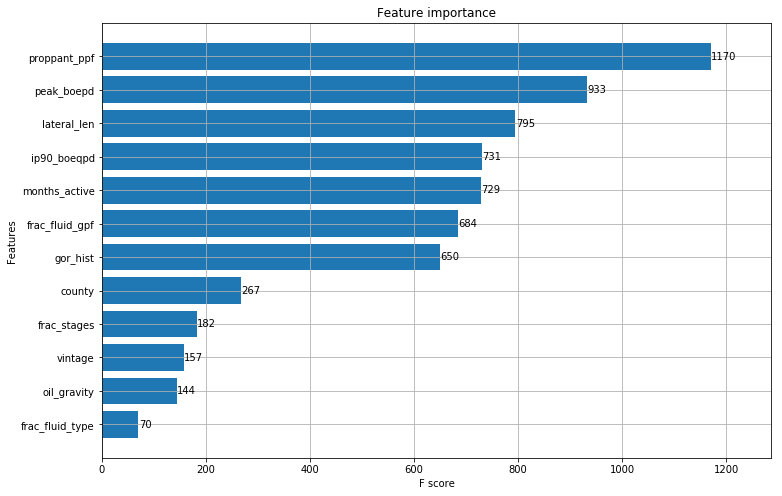

In [22]:
xgb_params = {
    'max_depth': 8,
    'seed' : 493
}
dtrain = xgb.DMatrix(xgb_df, df.recovery, feature_names=xgb_df.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=50)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,8))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

#### key features:
'proppant_ppf', 'peak_boepd', 'gor_hist', 'frac_fluid_gpf', 'months_active', 'lateral_len', 'ip90_boeqpd', 'county'

### Pairwise Scatterplots of Attributes

In [23]:
scaled_df.shape

(10619, 14)

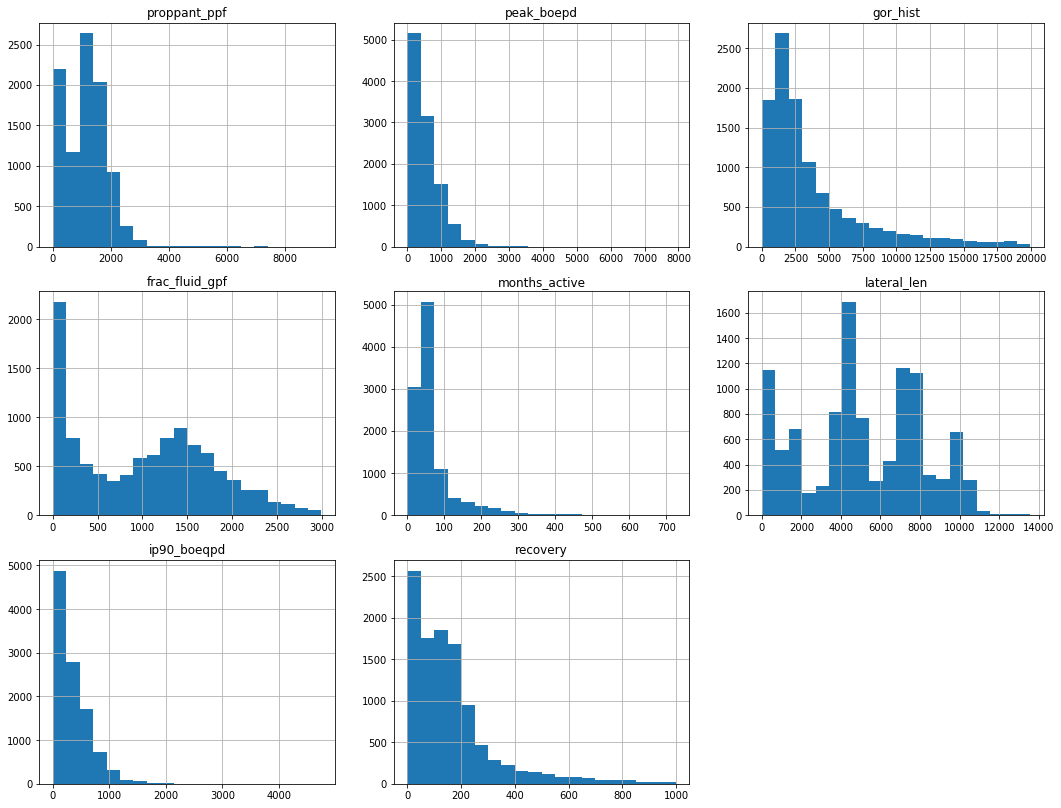

In [24]:
# county was taking a loooong time to plot. Why?
X_vars = ['proppant_ppf', 'peak_boepd', 'gor_hist', 'frac_fluid_gpf', 
          'months_active', 'lateral_len', 'ip90_boeqpd', 'recovery']

plt.figure(figsize=(18,14))
for i, col in enumerate(X_vars):  
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = scaled_df[col]
    plt.subplot(3, 3, plot_number)
    plt.title(col)
    df[col].hist(bins=20)

#### Tried plotting only county, but still took enormously long to run...

In [25]:
# X_vars = ['county']

# plt.figure(figsize=(18,14))
# for i, col in enumerate(X_vars):  
#     plot_number = i + 1 # i starts at 0, but plot nos should start at 1
#     series = scaled_df[col]
#     plt.subplot(3, 3, plot_number)
#     plt.title(col)
#     df[col].hist(bins=20)

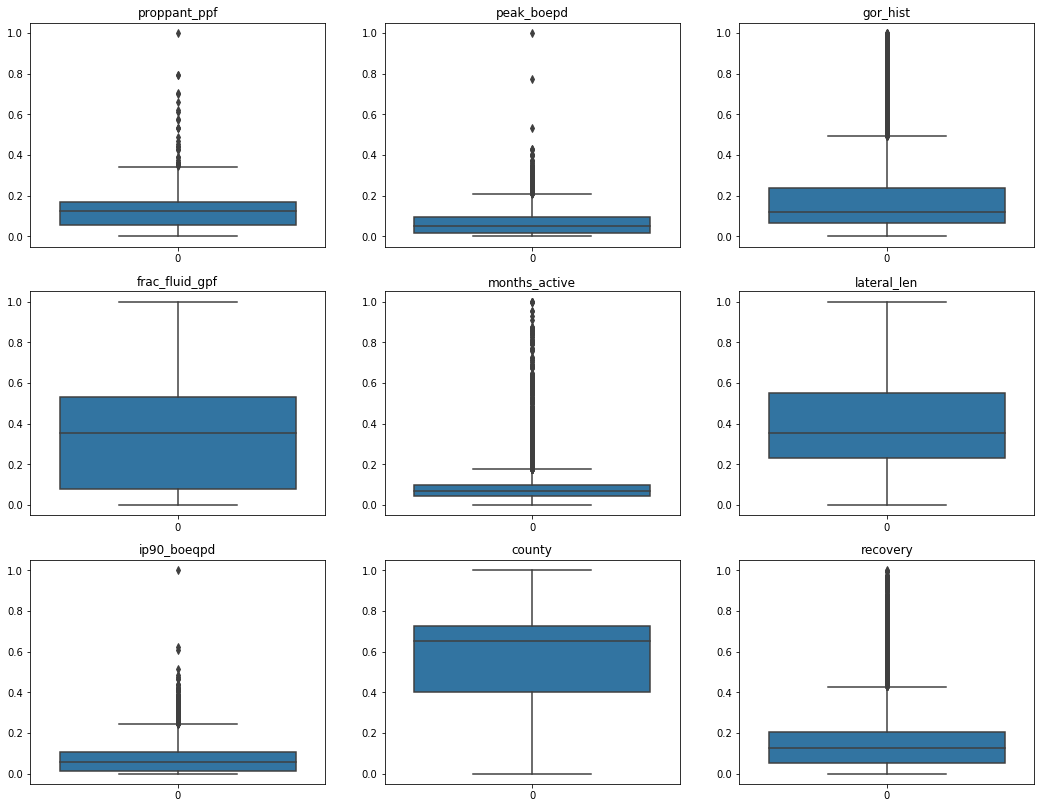

In [26]:
# 13 columns was too big to run, so dropped off 'ip90_boeqpd' and 'county'
X_vars = ['proppant_ppf', 'peak_boepd', 'gor_hist', 'frac_fluid_gpf', 
          'months_active', 'lateral_len', 'ip90_boeqpd', 'county', 'recovery']

plt.figure(figsize=(18,14))
for plot_num, col in enumerate(X_vars):  
    plt.subplot(3, 3, plot_num + 1)
    plt.title(col)
    sns.boxplot(data=scaled_df[col]) 

# There are still a lot of outliers...

#### Create a jointplot for each independent variable (normalized version) with the dependent variable.

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local

<Figure size 1296x1008 with 0 Axes>

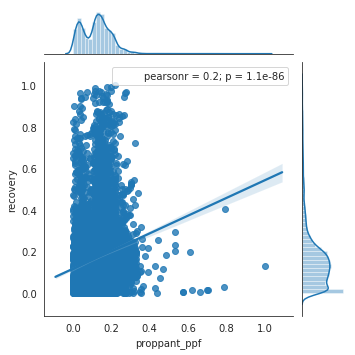

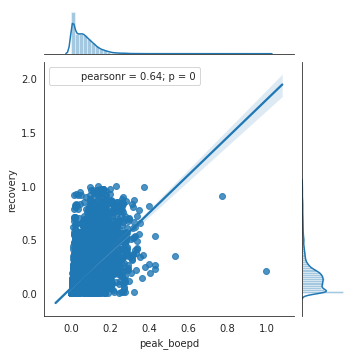

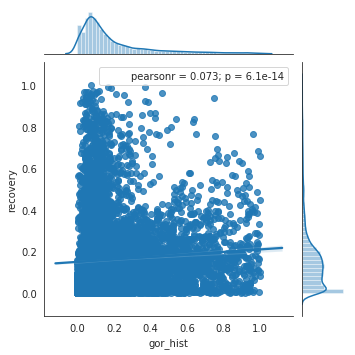

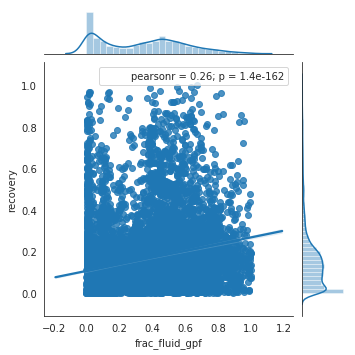

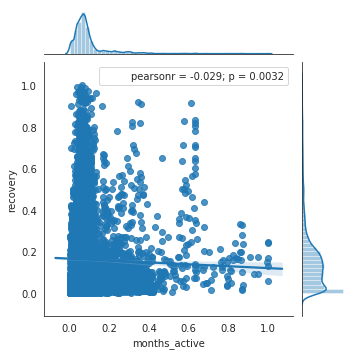

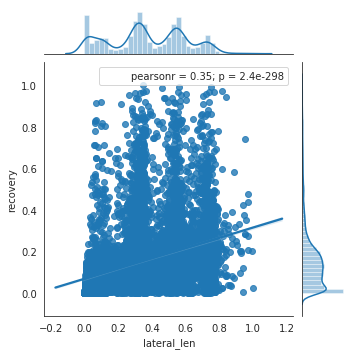

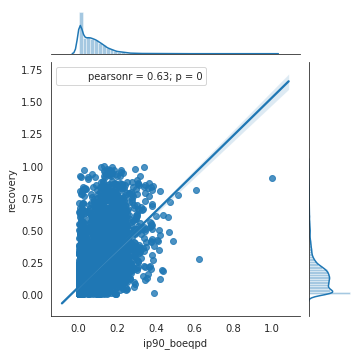

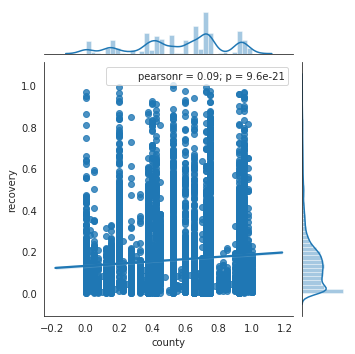

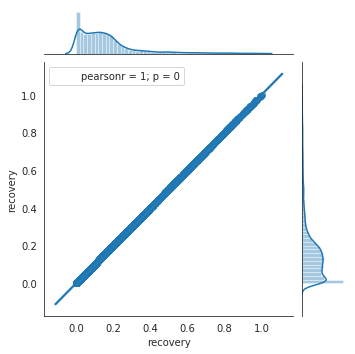

In [27]:
plt.figure(figsize=(18,14))

with sns.axes_style('white'):
    for i, col in enumerate(X_vars):  
        j = sns.jointplot(col, 'recovery', data=scaled_df, kind='reg', height=5);
        j.annotate(stats.pearsonr)

plt.show()

### Create a feature plot using seaborn's PairGrid() of the interaction between each variable (dependent + independent).

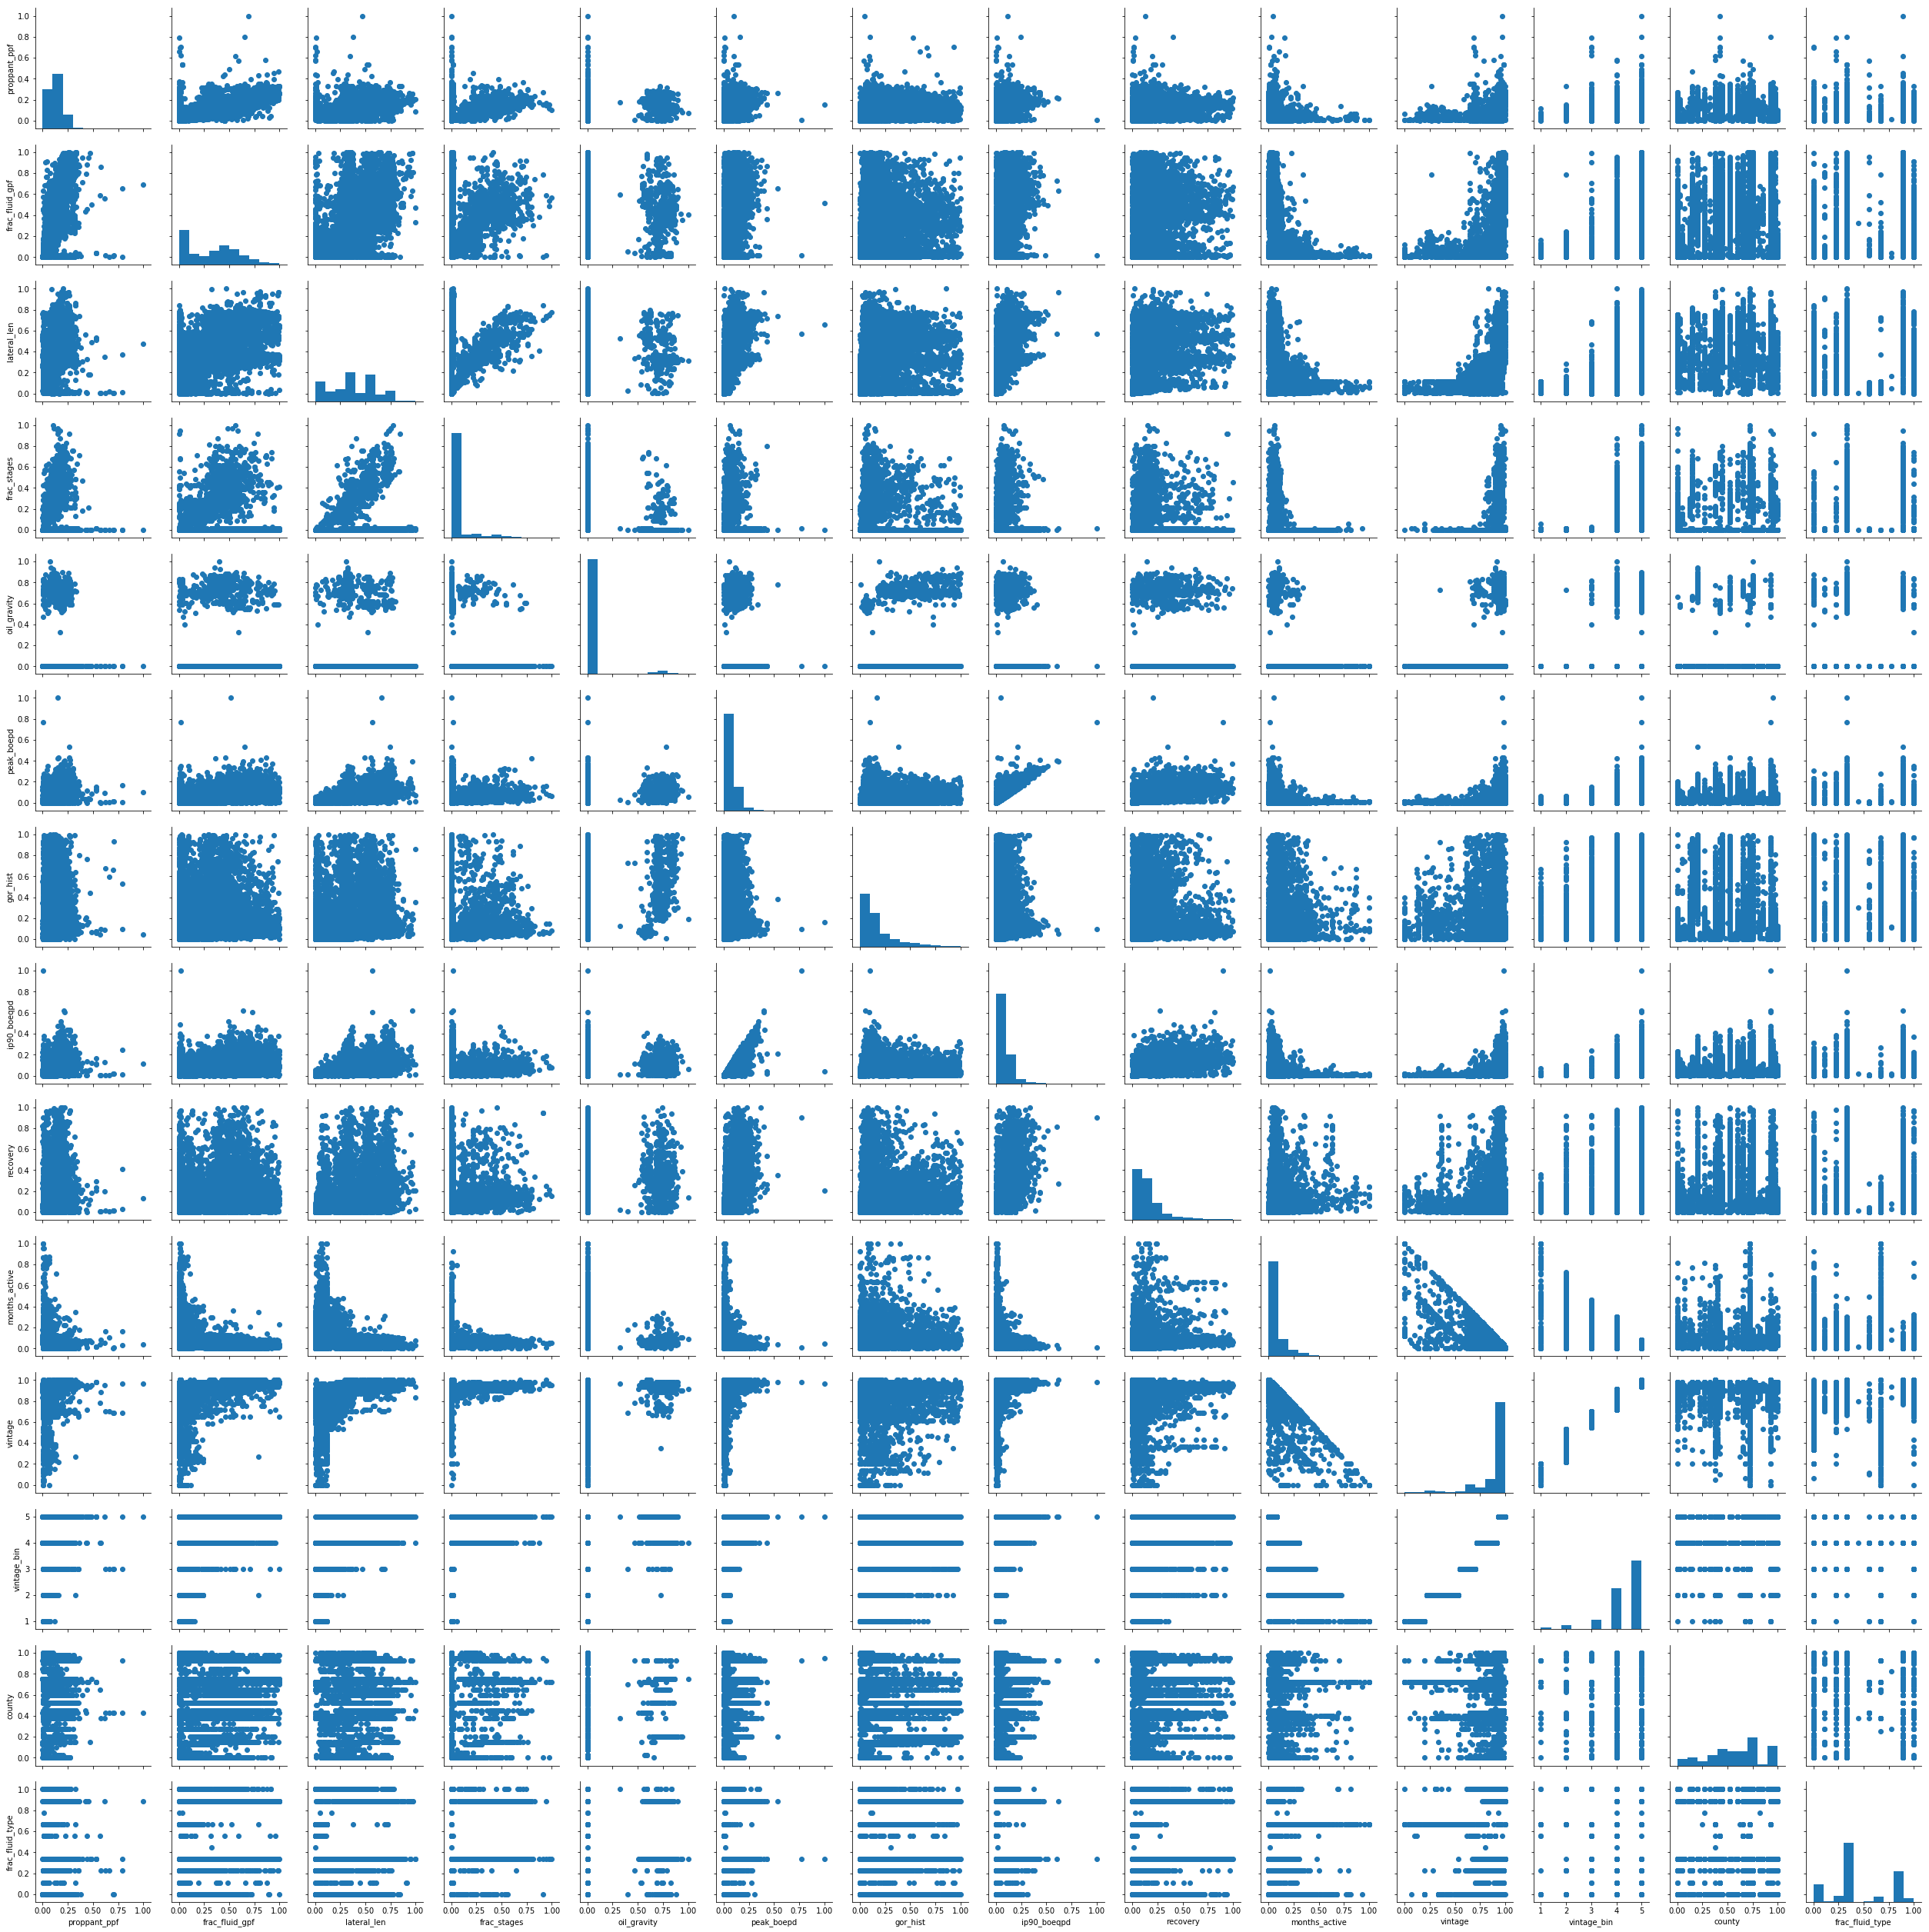

In [28]:
g = sns.PairGrid(scaled_df)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

#### Create a heatmap of the correlation between each variable pair.

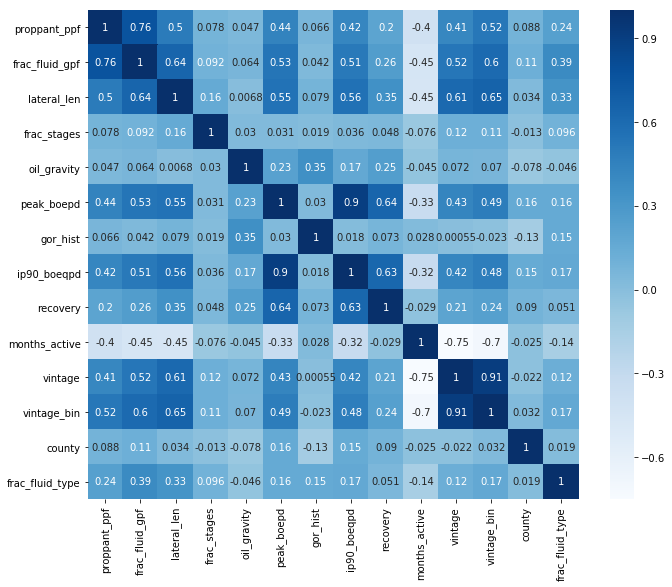

In [29]:
plt.figure(figsize=(11,9))

sns.heatmap(scaled_df.corr(), cmap='Blues', annot=True)

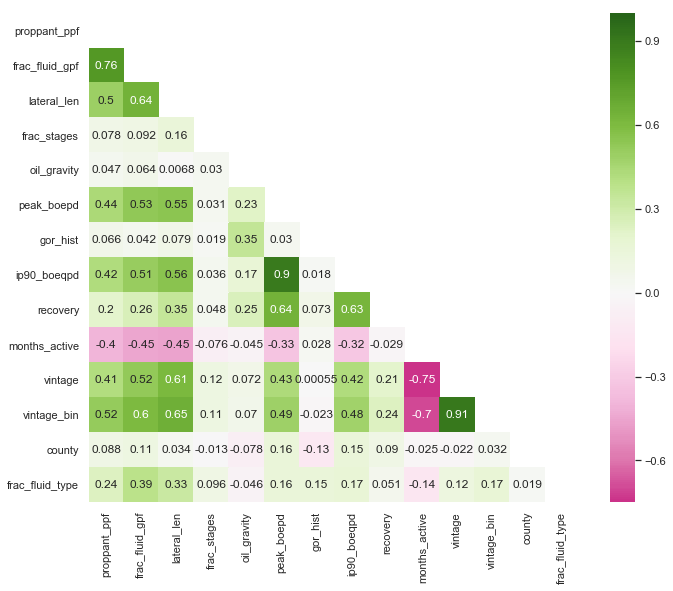

In [30]:
sns.set(style="white")

# Compute the correlation matrix
corr = scaled_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap='PiYG', annot=True, center=0)

## So xgboost is showing proppant_ppf as a primer feature. However, it has only a .2 correlation with recovery.
## peak_boepd has the highest correlation with recovery at .64.
## ip90_boeqpd comes in second with a .63 correlation with recovery.
## lateral_len comes in third with only as .35 correlation with recovery.
## We still have a lot of outliers. I wonder if they are messing with these results.

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


<Figure size 1296x1008 with 0 Axes>

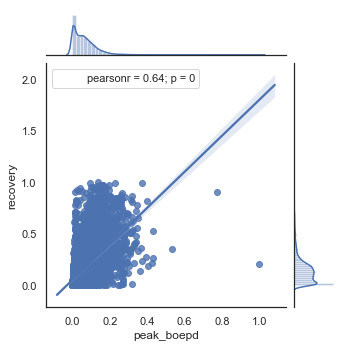

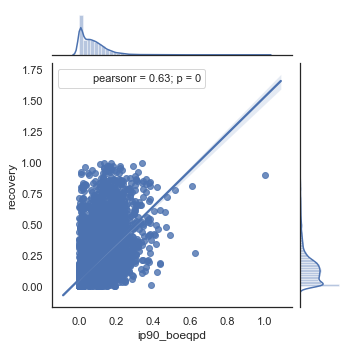

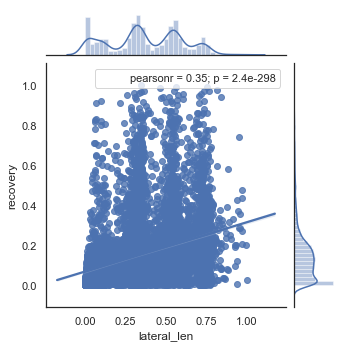

In [31]:
high_corr = ['peak_boepd', 'ip90_boeqpd', 'lateral_len']
plt.figure(figsize=(18,14))

with sns.axes_style('white'):
    for i, col in enumerate(high_corr):  
        j = sns.jointplot(col, 'recovery', data=scaled_df, kind='reg', height=5);
        j.annotate(stats.pearsonr)

plt.show()

## We might see more patterns in peak_boepd and ip90_boeqpd if we drop more outliers.
## The lateral_len is in clusters that are likely created by how many sections of land are purchased.

#### Use statsmodels ordinary least squares to assess the importance of each feature with respect to the target.
#### Drop rows with Nans because OLS cannot handle any Nans.

In [36]:
scaled_df.columns

Index(['proppant_ppf', 'frac_fluid_gpf', 'lateral_len', 'frac_stages',
       'oil_gravity', 'peak_boepd', 'gor_hist', 'ip90_boeqpd', 'recovery',
       'months_active', 'vintage', 'vintage_bin', 'county', 'frac_fluid_type'],
      dtype='object')

In [39]:
scaled_df.isnull().sum()

proppant_ppf       1283
frac_fluid_gpf        0
lateral_len           0
frac_stages         494
oil_gravity         248
peak_boepd            0
gor_hist              0
ip90_boeqpd           0
recovery              0
months_active         0
vintage               0
vintage_bin           0
county                0
frac_fluid_type       0
dtype: int64

In [57]:
scaled_df.dropna(subset=['proppant_ppf'], inplace=True)
scaled_df.dropna(subset=['frac_stages'], inplace=True)
scaled_df.dropna(subset=['oil_gravity'], inplace=True)
scaled_df.isnull().sum()

proppant_ppf       0
frac_fluid_gpf     0
lateral_len        0
frac_stages        0
oil_gravity        0
peak_boepd         0
gor_hist           0
ip90_boeqpd        0
recovery           0
months_active      0
vintage            0
vintage_bin        0
county             0
frac_fluid_type    0
dtype: int64

#### Then create train_test_split for OLS.

#### FIRST TRY:

In [58]:
# Independent variables:
X_vars = ['proppant_ppf', 'peak_boepd', 'gor_hist', 'frac_fluid_gpf', 
          'months_active', 'lateral_len', 'ip90_boeqpd', 'county']

# Dependent (target) variable, it is continuous
target = ['recovery']

X = scaled_df[X_vars].copy()                                                    
y = scaled_df[['recovery']]

In [59]:
# random_state=0 tells the sklearn function that you are not setting a seed
# if you want to be able to duplicate results, set random_state to a positive integer
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=123)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [60]:
if X_train.shape[0] == y_train.shape[0]:
    print("X & y train rows ARE equal")
else:
    print("X & y train rows ARE NOT equal")


if X_test.shape[0] == y_test.shape[0]:
    print("X & y test rows ARE equal")
else:
    print("X & y test rows ARE NOT equal")

if train.shape[1] == test.shape[1]:
    print("Number of columns in train & test ARE equal")
else:
    print("Number of columns in train & test ARE NOT equal")
 
train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print("Train Split: %.2f" % train_split)
print("Test Split: %.2f" % test_split)

X & y train rows ARE equal
X & y test rows ARE equal
Number of columns in train & test ARE equal
Train Split: 0.80
Test Split: 0.20


In [61]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               recovery   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     2937.
Date:                Sun, 02 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:23:02   Log-Likelihood:                 5377.0
No. Observations:                7106   AIC:                        -1.074e+04
Df Residuals:                    7098   BIC:                        -1.068e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
proppant_ppf      -0.2401      0.029     -8.378      0.000      -0.296      -0.184
peak_boepd         1.1992      0.050     24.139      0.000       1.102       1.297
gor_hist           0.0608      0.007      8.461      0.000       0.047       0.075
frac_fluid_gpf     0.0076      0.009      0.814      0.416      -0.011       0.026
months_active      0.4092      0.024     17.362      0.000       0.363       0.455
lateral_len        0.0300      0.008      3.790      0.000       0.014       0.046
ip90_boeqpd        0.7337      0.043     17.215      0.000       0.650       0.817
county             0.0045      0.005      0.970      0.332      -0.005       0.014
==============================================================================
Omnibus:                     2990.383   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30853.069
Skew:                           1.732   Prob(JB):                         0.00
Kurtosis:                      12.603   Cond. No.                         41.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Asses if our data is a good fit for a linear regression... although I know we are going for a polynomial regression...

If the data is good for modeling, then our residuals will have certain characteristics. These characteristics are:

1. The data is “linear”. That is, the dependent variable is a linear function of independent variables and an error term e, and is largely dependent on characteristics 2-4. Think of the equation of a line in two dimensions: y = mx + b + e. yis the dependent or “response” variable, xis the input, mis the dimensional coefficient and bis the intercept (when x = 0). We can easily extend this “line” to higher dimensions by adding more inputs and coefficients, creating a hyperplane with the following form: y = a1\*x1+ a2\*x2+ … + an\*xn
2. Errors are normally distributed across the data. In other words, if you plotted the errors on a graph, they should take on the traditional bell-curve or Gaussian shape.
3. There is “homoscedasticity”. This means that the variance of the errors is consistent across the entire dataset. We want to avoid situations where the error rate grows in a particular direction. 
4. The independent variables are actually independent and not collinear. We want to ensure independence between all of our inputs, otherwise our inputs will affect each other, instead of our response.



Omnibus:	2990.383 -- NOT GOOD
- Omnibus/Prob(Omnibus) – a test of the skewness and kurtosis of the residual. (Errors are normally distributed across the data. In other words, if you plotted the errors on a graph, they should take on the traditional bell-curve or Gaussian shape.) We hope to see a value close to *zero* which would indicate normalcy. 


Prob(Omnibus):	0.000 -- SHOULD BE CLOSE TO 1
- The Prob (Omnibus) performs a statistical test indicating the probability that the residuals are normally distributed. We hope to see something *close to 1* here. 

- In this case Omnibus is high and the Prob (Omnibus) is zero. A linear regression approach will not likely yield results as good as from a nonlinear approach.


Skew:	1.732 -- MIGHT BE OKAY
- Skew – a measure of data symmetry. We want to see something close to *zero*, indicating the residual distribution is normal. Note that this value also drives the Omnibus. 


Kurtosis:	12.603 -- 
- Kurtosis – a measure of “peakiness”, or curvature of the data. Higher peaks lead to greater Kurtosis. Greater Kurtosis can be interpreted as a tighter clustering of residuals around zero, implying a better model with few outliers. 


Durbin-Watson:	2.018 -- SHOULD BE BETWEEN 1 AND 2
- Durbin-Watson – tests for homoscedasticity. (There is “homoscedasticity”. This means that the variance of the errors is consistent across the entire dataset. We want to avoid situations where the error rate grows in a particular direction.). 


Jarque-Bera (JB):	30853.069 -- OMNIBUS TEST YIELDED 2990.383
- Jarque-Bera (JB)/Prob(JB) – like the Omnibus test in that it tests both skew and kurtosis. We hope to see in this test a confirmation of the Omnibus test.  


Cond. No.:	41.8 -- OVER 30, SO LIKELY HAVE MULTICOLLINEARITY IN OUR DATA
- Condition Number – This test measures the sensitivity of a function’s output as compared to its input. (The independent variables are actually independent and not collinear. We want to ensure independence between all of our inputs, otherwise our inputs will affect each other, instead of our response.) When we have multicollinearity, we can expect much higher fluctuations to small changes in the data, hence, we hope to see a relatively small number, something *below 30*. 

# We might be able to improve these numbers by dropping some features.
#### SECOND TRY:

In [62]:
# Independent variables:
X_vars = ['proppant_ppf', 'frac_fluid_gpf', 
          'months_active', 'lateral_len', 'county']

# Dependent (target) variable, it is continuous
target = ['recovery']

X = scaled_df[X_vars].copy()                                                    
y = scaled_df[['recovery']]

In [63]:
# random_state=0 tells the sklearn function that you are not setting a seed
# if you want to be able to duplicate results, set random_state to a positive integer
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=123)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [64]:
if X_train.shape[0] == y_train.shape[0]:
    print("X & y train rows ARE equal")
else:
    print("X & y train rows ARE NOT equal")


if X_test.shape[0] == y_test.shape[0]:
    print("X & y test rows ARE equal")
else:
    print("X & y test rows ARE NOT equal")

if train.shape[1] == test.shape[1]:
    print("Number of columns in train & test ARE equal")
else:
    print("Number of columns in train & test ARE NOT equal")
 
train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print("Train Split: %.2f" % train_split)
print("Test Split: %.2f" % test_split)

X & y train rows ARE equal
X & y test rows ARE equal
Number of columns in train & test ARE equal
Train Split: 0.80
Test Split: 0.20


In [65]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               recovery   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     2125.
Date:                Sun, 02 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:35:15   Log-Likelihood:                 3436.5
No. Observations:                7106   AIC:                            -6863.
Df Residuals:                    7101   BIC:                            -6829.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
proppant_ppf      -0.0154      0.037     -0.415      0.678      -0.088       0.057
frac_fluid_gpf     0.0687      0.012      5.588      0.000       0.045       0.093
months_active      0.2948      0.029     10.161      0.000       0.238       0.352
lateral_len        0.2260      0.010     23.522      0.000       0.207       0.245
county             0.0562      0.006      9.405      0.000       0.044       0.068
==============================================================================
Omnibus:                     3300.038   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17247.676
Skew:                           2.239   Prob(JB):                         0.00
Kurtosis:                       9.180   Cond. No.                         18.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

If the data is good for modeling, then our residuals will have certain characteristics. These characteristics are:

1. The data is “linear”. That is, the dependent variable is a linear function of independent variables and an error term e, and is largely dependent on characteristics 2-4. Think of the equation of a line in two dimensions: y = mx + b + e. yis the dependent or “response” variable, xis the input, mis the dimensional coefficient and bis the intercept (when x = 0). We can easily extend this “line” to higher dimensions by adding more inputs and coefficients, creating a hyperplane with the following form: y = a1\*x1+ a2\*x2+ … + an\*xn
2. Errors are normally distributed across the data. In other words, if you plotted the errors on a graph, they should take on the traditional bell-curve or Gaussian shape.
3. There is “homoscedasticity”. This means that the variance of the errors is consistent across the entire dataset. We want to avoid situations where the error rate grows in a particular direction. 
4. The independent variables are actually independent and not collinear. We want to ensure independence between all of our inputs, otherwise our inputs will affect each other, instead of our response.



Omnibus:	3300.038 -- WORSE
- Omnibus/Prob(Omnibus) – a test of the skewness and kurtosis of the residual. (Errors are normally distributed across the data. In other words, if you plotted the errors on a graph, they should take on the traditional bell-curve or Gaussian shape.) We hope to see a value close to *zero* which would indicate normalcy. 


Prob(Omnibus):	0.000 -- SHOULD BE CLOSE TO 1
- The Prob (Omnibus) performs a statistical test indicating the probability that the residuals are normally distributed. We hope to see something *close to 1* here. 

- In this case Omnibus is high and the Prob (Omnibus) is zero. A linear regression approach will not likely yield results as good as from a nonlinear approach.


Skew:	2.239 -- WORSE
- Skew – a measure of data symmetry. We want to see something close to *zero*, indicating the residual distribution is normal. Note that this value also drives the Omnibus. 


Kurtosis:	9.180 -- WORSE 
- Kurtosis – a measure of “peakiness”, or curvature of the data. Higher peaks lead to greater Kurtosis. Greater Kurtosis can be interpreted as a tighter clustering of residuals around zero, implying a better model with few outliers. 


Durbin-Watson:	1.987 -- BETTER!
- Durbin-Watson – tests for homoscedasticity. (There is “homoscedasticity”. This means that the variance of the errors is consistent across the entire dataset. We want to avoid situations where the error rate grows in a particular direction.). 


Jarque-Bera (JB):	17247.676 -- OMNIBUS TEST YIELDED 3300.038
- Jarque-Bera (JB)/Prob(JB) – like the Omnibus test in that it tests both skew and kurtosis. We hope to see in this test a confirmation of the Omnibus test.  


Cond. No.:	18.8 -- MUCH BETTER!
- Condition Number – This test measures the sensitivity of a function’s output as compared to its input. (The independent variables are actually independent and not collinear. We want to ensure independence between all of our inputs, otherwise our inputs will affect each other, instead of our response.) When we have multicollinearity, we can expect much higher fluctuations to small changes in the data, hence, we hope to see a relatively small number, something *below 30*. 

#### THIRD TRY:

In [71]:
# Independent variables:
X_vars = ['proppant_ppf', 'peak_boepd', 'gor_hist', 'frac_fluid_gpf']

# Dependent (target) variable, it is continuous
target = ['recovery']

X = scaled_df[X_vars].copy()                                                    
y = scaled_df[['recovery']]

In [72]:
# random_state=0 tells the sklearn function that you are not setting a seed
# if you want to be able to duplicate results, set random_state to a positive integer
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=123)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [73]:
if X_train.shape[0] == y_train.shape[0]:
    print("X & y train rows ARE equal")
else:
    print("X & y train rows ARE NOT equal")


if X_test.shape[0] == y_test.shape[0]:
    print("X & y test rows ARE equal")
else:
    print("X & y test rows ARE NOT equal")

if train.shape[1] == test.shape[1]:
    print("Number of columns in train & test ARE equal")
else:
    print("Number of columns in train & test ARE NOT equal")
 
train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print("Train Split: %.2f" % train_split)
print("Test Split: %.2f" % test_split)

X & y train rows ARE equal
X & y test rows ARE equal
Number of columns in train & test ARE equal
Train Split: 0.80
Test Split: 0.20


In [74]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               recovery   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     5029.
Date:                Sun, 02 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:46:25   Log-Likelihood:                 4959.9
No. Observations:                7106   AIC:                            -9912.
Df Residuals:                    7102   BIC:                            -9884.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
proppant_ppf      -0.1614      0.030     -5.446      0.000      -0.220      -0.103
peak_boepd         2.0157      0.027     74.629      0.000       1.963       2.069
gor_hist           0.1244      0.007     17.991      0.000       0.111       0.138
frac_fluid_gpf     0.0409      0.009      4.398      0.000       0.023       0.059
==============================================================================
Omnibus:                     2244.871   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68688.020
Skew:                           0.889   Prob(JB):                         0.00
Kurtosis:                      18.127   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

FOURTH TRY:

In [75]:
# Independent variables:
X_vars = ['gor_hist', 'frac_fluid_gpf', 'months_active', 'lateral_len']

# Dependent (target) variable, it is continuous
target = ['recovery']

X = scaled_df[X_vars].copy()                                                    
y = scaled_df[['recovery']]

In [76]:
# random_state=0 tells the sklearn function that you are not setting a seed
# if you want to be able to duplicate results, set random_state to a positive integer
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=123)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [77]:
if X_train.shape[0] == y_train.shape[0]:
    print("X & y train rows ARE equal")
else:
    print("X & y train rows ARE NOT equal")


if X_test.shape[0] == y_test.shape[0]:
    print("X & y test rows ARE equal")
else:
    print("X & y test rows ARE NOT equal")

if train.shape[1] == test.shape[1]:
    print("Number of columns in train & test ARE equal")
else:
    print("Number of columns in train & test ARE NOT equal")
 
train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print("Train Split: %.2f" % train_split)
print("Test Split: %.2f" % test_split)

X & y train rows ARE equal
X & y test rows ARE equal
Number of columns in train & test ARE equal
Train Split: 0.80
Test Split: 0.20


In [78]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               recovery   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     2619.
Date:                Sun, 02 Jun 2019   Prob (F-statistic):               0.00
Time:                        21:16:07   Log-Likelihood:                 3406.3
No. Observations:                7106   AIC:                            -6805.
Df Residuals:                    7102   BIC:                            -6777.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
gor_hist           0.0499      0.009      5.348      0.000       0.032       0.068
frac_fluid_gpf     0.0863      0.009      9.884      0.000       0.069       0.103
months_active      0.3877      0.027     14.604      0.000       0.336       0.440
lateral_len        0.2387      0.009     25.646      0.000       0.220       0.257
==============================================================================
Omnibus:                     3272.768   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16964.802
Skew:                           2.220   Prob(JB):                         0.00
Kurtosis:                       9.130   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

```
WHAT WE WANT:
Omnibus:	CLOSE TO ZERO       Durbin-Watson:	avoid error rate growing in particular direction
Prob(Omnibus):	CLOSE TO ONE    Jarque-Bera (JB):	SAME AS OMNIBUS
Skew:	CLOSE TO ZERO           Prob(JB):	???
Kurtosis:	HIGHER THE BETTER?  Cond. No.	BELOW THIRTY

first test:
X_vars = ['proppant_ppf', 'peak_boepd', 'gor_hist', 'frac_fluid_gpf', 
          'months_active', 'lateral_len', 'ip90_boeqpd', 'county']
Omnibus:	2990.383      Durbin-Watson:	2.018
Prob(Omnibus):	0.000   Jarque-Bera (JB):	30853.069
Skew:	1.732	        Prob(JB):	0.00
Kurtosis:	12.603	   Cond. No.	41.8


second test:
X_vars = ['proppant_ppf', 'frac_fluid_gpf', 'months_active', 'lateral_len', 'county']
Omnibus:	3300.038      Durbin-Watson:	1.987
Prob(Omnibus):	0.000   Jarque-Bera (JB):	17247.676
Skew:	2.239	        Prob(JB):	0.00
Kurtosis:	9.180        Cond. No.	18.8


third test:
X_vars = ['proppant_ppf', 'peak_boepd', 'gor_hist', 'frac_fluid_gpf']
Omnibus:	2244.871      Durbin-Watson:	1.992
Prob(Omnibus):	0.000   Jarque-Bera (JB):	68688.020
Skew:	0.889	        Prob(JB):	0.00
Kurtosis:	18.127	   Cond. No.	11.5

fourth test:
X_vars = ['gor_hist', 'frac_fluid_gpf', 'months_active', 'lateral_len']
Omnibus:	3272.768      Durbin-Watson:	1.984
Prob(Omnibus):	0.000   Jarque-Bera (JB):	16964.802
Skew:	2.220            Prob(JB):	0.00
Kurtosis:	9.130        Cond. No.	10.1

```

- Omnibus/Prob(Omnibus) – a test of the skewness and kurtosis of the residual. (Errors are normally distributed across the data. In other words, if you plotted the errors on a graph, they should take on the traditional bell-curve or Gaussian shape.) We hope to see a value close to *zero* which would indicate normalcy. 

- The Prob (Omnibus) performs a statistical test indicating the probability that the residuals are normally distributed. We hope to see something *close to 1* here. 

    - In this case Omnibus is high and the Prob (Omnibus) is zero. A linear regression approach will not likely yield results as good as from a nonlinear approach.

- Skew – a measure of data symmetry. We want to see something close to *zero*, indicating the residual distribution is normal. Note that this value also drives the Omnibus. 

- Kurtosis – a measure of “peakiness”, or curvature of the data. Higher peaks lead to greater Kurtosis. Greater Kurtosis can be interpreted as a tighter clustering of residuals around zero, implying a better model with few outliers. 

- Durbin-Watson – tests for homoscedasticity. (There is “homoscedasticity”. This means that the variance of the errors is consistent across the entire dataset. We want to avoid situations where the error rate grows in a particular direction.). 

- Jarque-Bera (JB)/Prob(JB) – like the Omnibus test in that it tests both skew and kurtosis. We hope to see in this test a confirmation of the Omnibus test.  

- Condition Number – This test measures the sensitivity of a function’s output as compared to its input. (The independent variables are actually independent and not collinear. We want to ensure independence between all of our inputs, otherwise our inputs will affect each other, instead of our response.) When we have multicollinearity, we can expect much higher fluctuations to small changes in the data, hence, we hope to see a relatively small number, something *below 30*. 